In [1]:
# -*- coding: utf-8 -*-
from pylab import*
import matplotlib.pyplot as plt
from numpy import*
from matplotlib.pyplot import*
import pandas as pd
import time
import sys
import warnings
warnings.filterwarnings('ignore')

y_lbl=50
x_lbl =50


ers_bar = 1.3  # dimensione barre errore
pnt_dat = 6 # dimensione punti

title_s=35 #dimensione titolo bin

fit_l=3.  # dimensione linea fit


In [2]:
#dati_lp=pd.read_csv('fit_parameters/new_bands_/lp_point_gauss_tot.csv')
#dati_lk=pd.read_csv('fit_parameters/new_bands_/lk_point_gauss_tot.csv')
dati_lp=pd.read_csv('fit_parameters/4plot_/lines_lp_gauss.csv')
dati_lk=pd.read_csv('fit_parameters/4plot_/lines_lk_gauss.csv')
dati_exp=pd.read_csv("exp_data/lambda_had_global.dat", delimiter=r"\s+", header=0, engine='python')
df_k = pd.read_csv('fit_parameters/4plot_/dati_lk_conv_0.25chi_1.192.csv')  #reference lines
df_p = pd.read_csv('fit_parameters/4plot_/dati_lp_conv_0.25chi_1.192.csv')

In [3]:
dati_lp

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,had1,had2,z1,z2,mins,maxx,fit_line,conv,valid_min,valid_max,reference
0,0,0,0,300.0,100.0,0.25,0.150,-0.015928,-0.010444,NaN,-0.013265,True,True,-0.019969
1,1,1,1,300.0,100.0,0.25,0.222,-0.032645,-0.023979,NaN,-0.028412,True,True,-0.029360
2,2,2,2,300.0,100.0,0.25,0.294,-0.049617,-0.036291,NaN,-0.043223,True,True,-0.038314
3,3,3,3,300.0,100.0,0.25,0.367,-0.064413,-0.045914,NaN,-0.056039,True,True,-0.046510
4,4,4,4,300.0,100.0,0.25,0.439,-0.078029,-0.054625,NaN,-0.067479,True,True,-0.054074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,155,155,155,310.0,105.0,0.60,0.511,-0.058596,-0.042915,NaN,-0.051296,True,True,-0.019007
156,156,156,156,310.0,105.0,0.60,0.583,-0.064387,-0.047014,NaN,-0.056289,True,True,-0.018758
157,157,157,157,310.0,105.0,0.60,0.656,-0.070895,-0.051583,NaN,-0.061883,True,True,-0.017678
158,158,158,158,310.0,105.0,0.60,0.728,-0.080069,-0.056628,NaN,-0.069163,True,True,-0.015693


In [4]:
df_k

,had1,had2,z1,z2,mins,maxx,fit_line,conv
0,300.0,200.0,0.25,0.150000,-0.019255,-0.013224,-0.016370,-0.010766
1,300.0,200.0,0.25,0.203571,-0.027874,-0.018988,-0.023592,-0.019941
2,300.0,200.0,0.25,0.257143,-0.036161,-0.024137,-0.030321,-0.029452
3,300.0,200.0,0.25,0.310714,-0.043508,-0.028543,-0.036255,-0.037885
4,300.0,200.0,0.25,0.364286,-0.049874,-0.032338,-0.041377,-0.044938
...,...,...,...,...,...,...,...,...
235,310.0,205.0,0.60,0.685714,-0.098037,-0.063594,-0.081255,-0.067873
236,310.0,205.0,0.60,0.739286,-0.103062,-0.067223,-0.085658,-0.069329
237,310.0,205.0,0.60,0.792857,-0.107735,-0.070645,-0.089783,-0.070636
238,310.0,205.0,0.60,0.846429,-0.112070,-0.073865,-0.093635,-0.071823


In [5]:

z1=[0.25,.35,.45,.6]
lim=[-0.15,0.15]
ct=1
z_err =[[0.05,0.05,0.05,0.1],[0.05,0.05,0.05,0.3]]


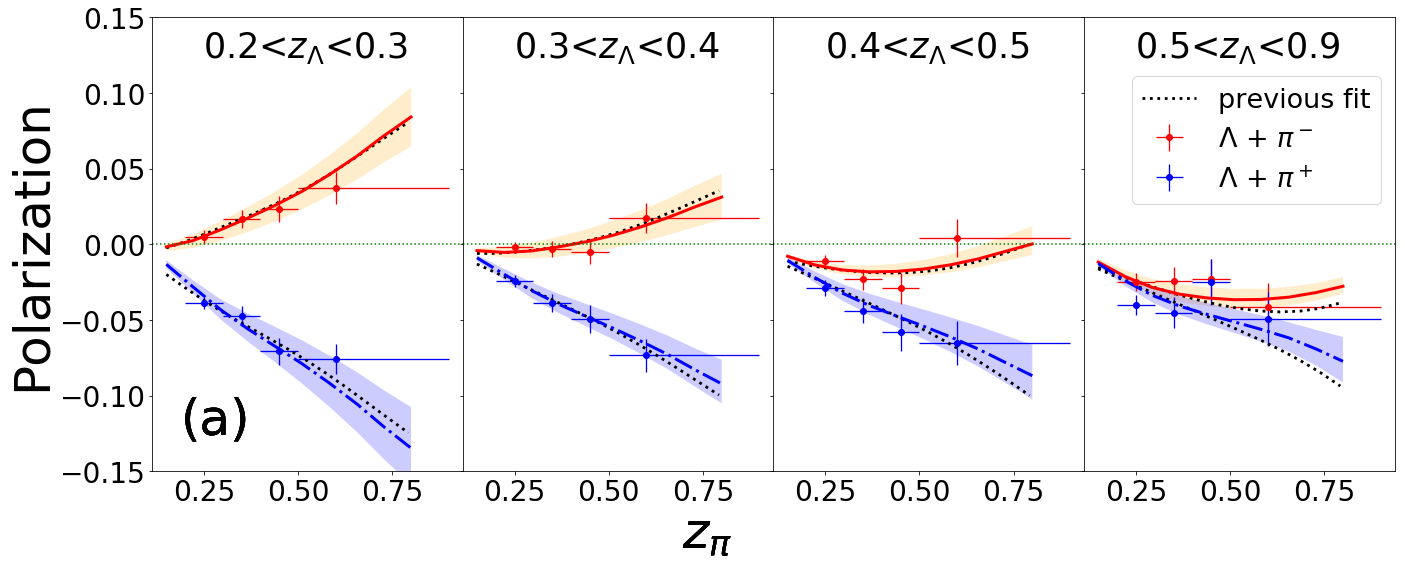

In [6]:
ct=1
fig, axes = plt.subplots(1,4)
for zs,ax in zip(z1,axes):

    #fig.suptitle('$\Lambda$ - $\pi^+$ -- coef = '+str(coef)+' $\chi^2_{dof}$ = '+str(chi),fontsize=30)	
    dt = dati_lp.loc[(dati_lp['had1']==300) & (dati_lp['z1']==zs)& (dati_lp['had2']==100)]
    dt_ref = df_p.loc[(df_p['had1']==300) & (df_p['z1']==zs)& (df_p['had2']==100)]
    dt_ref = dt_ref.loc[(dt_ref['z2']<0.8)]
    
    dt2 = dati_lp.loc[(dati_lp['had1']==300) & (dati_lp['z1']==zs)& (dati_lp['had2']==105)]
    dt_ref2 = df_p.loc[(df_p['had1']==300) & (df_p['z1']==zs)& (df_p['had2']==105)]
    dt_ref2 = dt_ref2.loc[(dt_ref2['z2']<0.8)]

    pnt = dati_exp.loc[(dati_exp['h1']==300) & (dati_exp['z1']==zs)& (dati_exp['h2']==100)]	
    #pnt_white = undati_exp.loc[(undati_exp['h1']==300) & (undati_exp['z1']==zs)& (undati_exp['h2']==100)]	
    pnt2 = dati_exp.loc[(dati_exp['h1']==300) & (dati_exp['z1']==zs)& (dati_exp['h2']==105)]	


    ax=plt.subplot(1,4,ct)
    ###   reference lines
    ax.plot(dt_ref.z2,dt_ref.fit_line,label='previous fit',linestyle='dotted',linewidth=fit_l-0.2,color='black')
    ax.plot(dt_ref2.z2,dt_ref2.fit_line,label='_nolegend_',linestyle='dotted',linewidth=fit_l-0.2,color='black')

    ### new fit lines
    ax.plot(dt2.z2,dt2.conv,label='_nolegend_',linewidth=fit_l,color='red')
    ax.plot(dt.z2,dt.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='blue')

    ### confidence interval bands
    ax.fill_between(dt2.z2,dt2.maxx,dt2.mins,facecolor='orange', alpha=0.2)
    ax.fill_between(dt.z2,dt.maxx,dt.mins,facecolor='blue', alpha=0.2)
    
    axhline(linewidth=1.5, ls=':', color='g')
    ### experimental points with error bars
    ax.errorbar(pnt2.z2, pnt2.P_exp, pnt2.err, z_err, fmt='o', markersize=pnt_dat, color='red',elinewidth=ers_bar, label= '$\Lambda$ + $\pi^-$')
    ax.errorbar(pnt.z2, pnt.P_exp, pnt.err, z_err, fmt='o', markersize=pnt_dat, color='blue',elinewidth=ers_bar, label= '$\Lambda$ + $\pi^+$')

    #xlabel("$z_{\pi}$",size=12)


    if zs == 0.25: title("0.2<$z_{\Lambda}$<0.3 ",fontsize=title_s,x=0.5, y=.9)
    if zs == 0.35: title("0.3<$z_{\Lambda}$<0.4 ",fontsize=title_s,x=0.5, y=.9)
    if zs == 0.45: title("0.4<$z_{\Lambda}$<0.5 ",fontsize=title_s,x=0.5, y=.9)
    if zs == 0.6: title("0.5<$z_{\Lambda}$<0.9 ",fontsize=title_s,x=0.5, y=.9)

    ax.tick_params(axis='both', which='major', labelsize=28)
    if ct >1: ax.set_yticklabels([])

    if ct ==4 :legend(loc='upper right',bbox_to_anchor=(1.,0.9), fontsize=27,frameon=True), 
    if ct==1:ylabel('Polarization',size=y_lbl) 
    ax.set_ylim(lim)
    ct+=1
    fig.text(0.5, 0.1, r'$z_{\pi}$', ha='center',size=x_lbl)
    fig.text(0.15, 0.25, '(a)', ha='center',size=x_lbl)
fig.subplots_adjust(top=0.8,bottom=0.2,left=0.105,right=0.99,hspace=0.2,wspace=0.0)
fig.set_size_inches(19.5, 10.5, forward=True)
fig.savefig('Lb_pi.pdf')
fig.savefig('Lb_pi.png')

In [7]:
print(zs)
print(ax)

0.6
AxesSubplot(0.76875,0.2;0.22125x0.6)


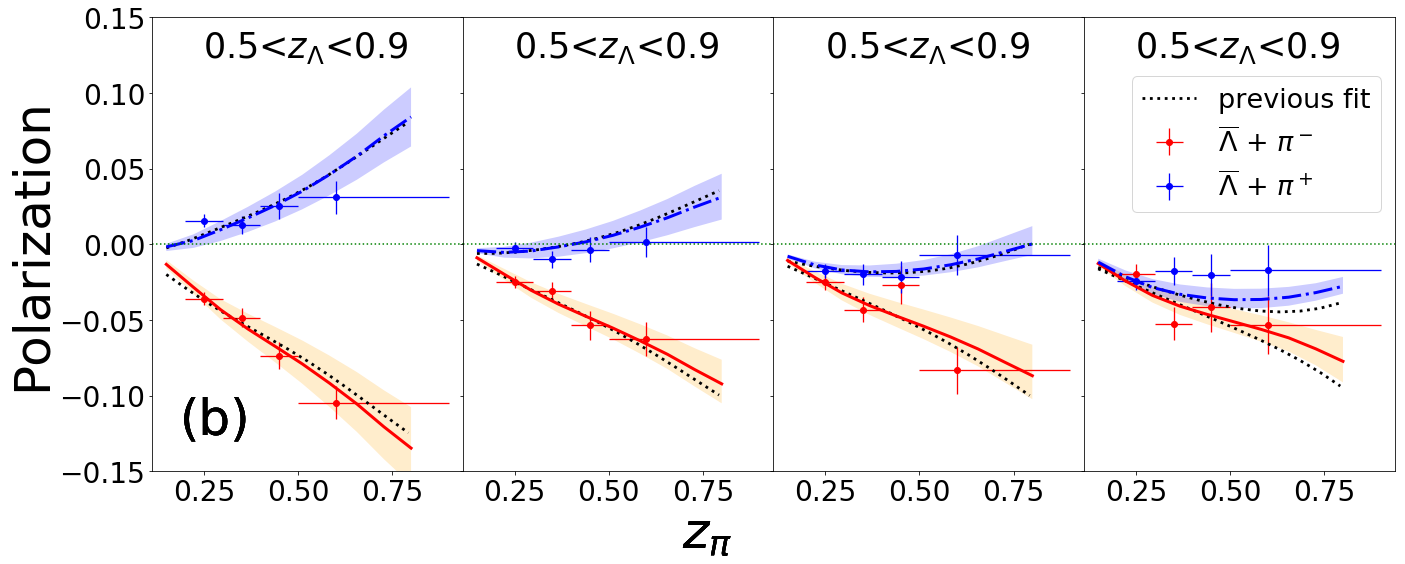

In [8]:
ct=1
fig2, axes2 = plt.subplots(1,4)
for zs2,ax2 in zip(z1,axes2):

    #fig.suptitle('$\Lambda$ - $\pi^+$ -- coef = '+str(coef)+' $\chi^2_{dof}$ = '+str(chi),fontsize=30)	
    dt = dati_lp.loc[(dati_lp['had1']==310) & (dati_lp['z1']==zs2)& (dati_lp['had2']==100)]
    dt_ref = df_p.loc[(df_p['had1']==310) & (df_p['z1']==zs2)& (df_p['had2']==100)]
    dt_ref = dt_ref.loc[(dt_ref['z2']<0.8)]
    
    dt2 = dati_lp.loc[(dati_lp['had1']==310) & (dati_lp['z1']==zs2)& (dati_lp['had2']==105)]
    dt_ref2 = df_p.loc[(df_p['had1']==310) & (df_p['z1']==zs2)& (df_p['had2']==105)]
    dt_ref2 = dt_ref2.loc[(dt_ref2['z2']<0.8)]

    pnt = dati_exp.loc[(dati_exp['h1']==310) & (dati_exp['z1']==zs2)& (dati_exp['h2']==100)]	
    #pnt_white = undati_exp.loc[(undati_exp['h1']==300) & (undati_exp['z1']==zs)& (undati_exp['h2']==100)]	
    pnt2 = dati_exp.loc[(dati_exp['h1']==310) & (dati_exp['z1']==zs2)& (dati_exp['h2']==105)]	


    ax2=plt.subplot(1,4,ct)
    ###   reference lines
    ax2.plot(dt_ref.z2,dt_ref.fit_line,label='previous fit',linestyle='dotted',linewidth=fit_l-0.2,color='black')
    ax2.plot(dt_ref2.z2,dt_ref2.fit_line,label='_nolegend_',linestyle='dotted',linewidth=fit_l-0.2,color='black')

    ### new fit lines
    ax2.plot(dt2.z2,dt2.conv,label='_nolegend_',linewidth=fit_l,color='red')
    ax2.plot(dt.z2,dt.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='blue')

    ### confidence interval bands
    ax2.fill_between(dt2.z2,dt2.maxx,dt2.mins,facecolor='orange', alpha=0.2)
    ax2.fill_between(dt.z2,dt.maxx,dt.mins,facecolor='blue', alpha=0.2)
    
    axhline(linewidth=1.5, ls=':', color='g')
    ### experimental points with error bars
    ax2.errorbar(pnt2.z2, pnt2.P_exp, pnt2.err, z_err, fmt='o', markersize=pnt_dat, color='red',elinewidth=ers_bar, label= '$\overline{\Lambda}$ + $\pi^-$')
    ax2.errorbar(pnt.z2, pnt.P_exp, pnt.err, z_err, fmt='o', markersize=pnt_dat, color='blue',elinewidth=ers_bar, label= '$\overline{\Lambda}$ + $\pi^+$')

    #xlabel("$z_{\pi}$",size=12)


    if zs == 0.25: title("0.2<$z_{\Lambda}$<0.3 ",fontsize=title_s,x=0.5, y=.9)
    if zs == 0.35: title("0.3<$z_{\Lambda}$<0.4 ",fontsize=title_s,x=0.5, y=.9)
    if zs == 0.45: title("0.4<$z_{\Lambda}$<0.5 ",fontsize=title_s,x=0.5, y=.9)
    if zs == 0.6: title("0.5<$z_{\Lambda}$<0.9 ",fontsize=title_s,x=0.5, y=.9)

    ax2.tick_params(axis='both', which='major', labelsize=28)
    if ct >1: ax2.set_yticklabels([])

    if ct ==4 :legend(loc='upper right',bbox_to_anchor=(1.,0.9), fontsize=27,frameon=True), 
    if ct==1:ylabel('Polarization',size=y_lbl) 
    ax2.set_ylim(lim)
    ct+=1
    fig2.text(0.5, 0.1, r'$z_{\pi}$', ha='center',size=x_lbl)
    fig2.text(0.15, 0.25, '(b)', ha='center',size=x_lbl)
fig2.subplots_adjust(top=0.8,bottom=0.2,left=0.105,right=0.99,hspace=0.2,wspace=0.0)
fig2.set_size_inches(19.5, 10.5, forward=True)
fig2.savefig('Lbbar_pi.pdf')
fig2.savefig('Lbbar_pi.png')

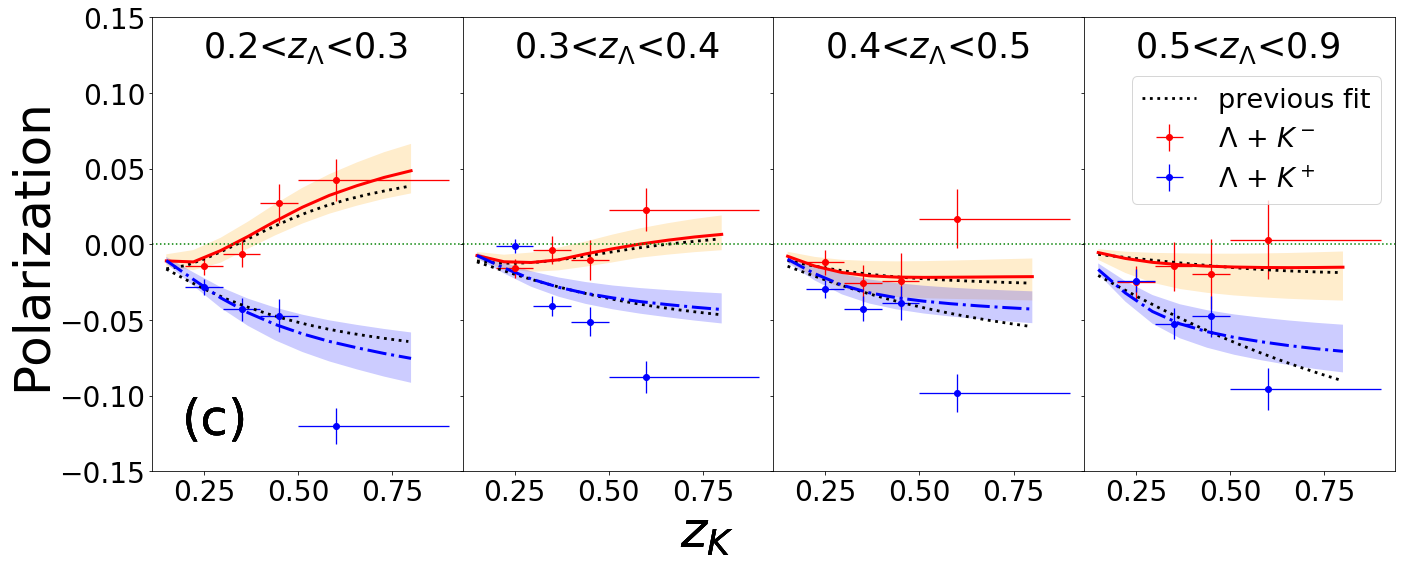

In [9]:
ct=1
fig, axes = plt.subplots(1,4)
for zs,ax in zip(z1,axes):

    #fig.suptitle('$\Lambda$ - $\pi^+$ -- coef = '+str(coef)+' $\chi^2_{dof}$ = '+str(chi),fontsize=30)	
    dt = dati_lk.loc[(dati_lk['had1']==300) & (dati_lk['z1']==zs)& (dati_lk['had2']==200)]
    dt_ref = df_k.loc[(df_k['had1']==300) & (df_k['z1']==zs)& (df_k['had2']==200)]
    dt_ref = dt_ref.loc[(dt_ref['z2']<0.8)]
    
    dt2 = dati_lk.loc[(dati_lk['had1']==300) & (dati_lk['z1']==zs)& (dati_lk['had2']==205)]
    dt_ref2 = df_k.loc[(df_k['had1']==300) & (df_k['z1']==zs)& (df_k['had2']==205)]
    dt_ref2 = dt_ref2.loc[(dt_ref2['z2']<0.8)]

    pnt = dati_exp.loc[(dati_exp['h1']==300) & (dati_exp['z1']==zs)& (dati_exp['h2']==200)]	
    #pnt_white = undati_exp.loc[(undati_exp['h1']==300) & (undati_exp['z1']==zs)& (undati_exp['h2']==100)]	
    pnt2 = dati_exp.loc[(dati_exp['h1']==300) & (dati_exp['z1']==zs)& (dati_exp['h2']==205)]	


    ax=plt.subplot(1,4,ct)
    ###   reference lines
    ax.plot(dt_ref.z2,dt_ref.fit_line,label='previous fit',linestyle='dotted',linewidth=fit_l-0.2,color='black')
    ax.plot(dt_ref2.z2,dt_ref2.fit_line,label='_nolegend_',linestyle='dotted',linewidth=fit_l-0.2,color='black')

    ### new fit lines
    ax.plot(dt2.z2,dt2.conv,label='_nolegend_',linewidth=fit_l,color='red')
    ax.plot(dt.z2,dt.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='blue')

    ### confidence interval bands
    ax.fill_between(dt2.z2,dt2.maxx,dt2.mins,facecolor='orange', alpha=0.2)
    ax.fill_between(dt.z2,dt.maxx,dt.mins,facecolor='blue', alpha=0.2)
    
    axhline(linewidth=1.5, ls=':', color='g')
    ### experimental points with error bars
    ax.errorbar(pnt2.z2, pnt2.P_exp, pnt2.err, z_err, fmt='o', markersize=pnt_dat, color='red',elinewidth=ers_bar, label= '$\Lambda$ + $K^-$')
    ax.errorbar(pnt.z2, pnt.P_exp, pnt.err, z_err, fmt='o', markersize=pnt_dat, color='blue',elinewidth=ers_bar, label= '$\Lambda$ + $K^+$')

    #xlabel("$z_{\pi}$",size=12)


    if zs == 0.25: title("0.2<$z_{\Lambda}$<0.3 ",fontsize=title_s,x=0.5, y=.9)
    if zs == 0.35: title("0.3<$z_{\Lambda}$<0.4 ",fontsize=title_s,x=0.5, y=.9)
    if zs == 0.45: title("0.4<$z_{\Lambda}$<0.5 ",fontsize=title_s,x=0.5, y=.9)
    if zs == 0.6: title("0.5<$z_{\Lambda}$<0.9 ",fontsize=title_s,x=0.5, y=.9)

    ax.tick_params(axis='both', which='major', labelsize=28)
    if ct >1: ax.set_yticklabels([])

    if ct ==4 :legend(loc='upper right',bbox_to_anchor=(1.,0.9), fontsize=27,frameon=True), 
    if ct==1:ylabel('Polarization',size=y_lbl) 
    ax.set_ylim(lim)
    ct+=1
    fig.text(0.5, 0.1, r'$z_{K}$', ha='center',size=x_lbl)
    fig.text(0.15, 0.25, '(c)', ha='center',size=x_lbl)
fig.subplots_adjust(top=0.8,bottom=0.2,left=0.105,right=0.99,hspace=0.2,wspace=0.0)
fig.set_size_inches(19.5, 10.5, forward=True)
fig.savefig('Lb_k.pdf')
fig.savefig('Lb_k.png')

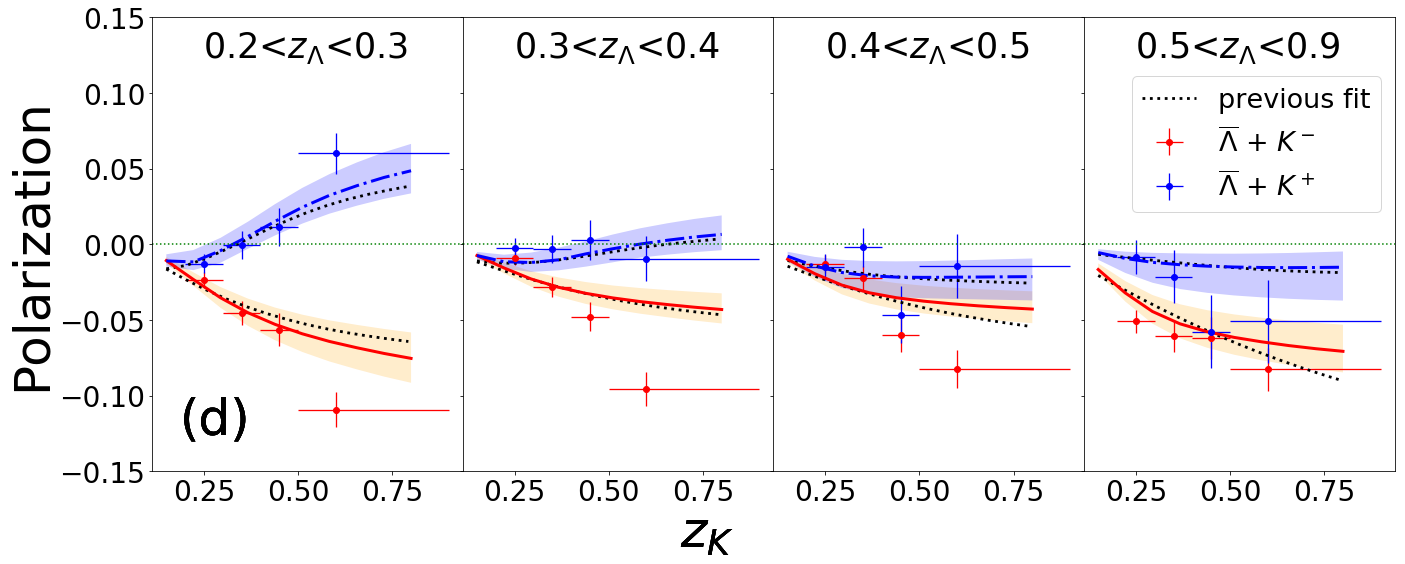

In [10]:
ct=1
fig, axes = plt.subplots(1,4)
for zs,ax in zip(z1,axes):

    #fig.suptitle('$\Lambda$ - $\pi^+$ -- coef = '+str(coef)+' $\chi^2_{dof}$ = '+str(chi),fontsize=30)	
    dt = dati_lk.loc[(dati_lk['had1']==310) & (dati_lk['z1']==zs)& (dati_lk['had2']==200)]
    dt_ref = df_k.loc[(df_k['had1']==310) & (df_k['z1']==zs)& (df_k['had2']==200)]
    dt_ref = dt_ref.loc[(dt_ref['z2']<0.8)]
    
    dt2 = dati_lk.loc[(dati_lk['had1']==310) & (dati_lk['z1']==zs)& (dati_lk['had2']==205)]
    dt_ref2 = df_k.loc[(df_k['had1']==310) & (df_k['z1']==zs)& (df_k['had2']==205)]
    dt_ref2 = dt_ref2.loc[(dt_ref2['z2']<0.8)]

    pnt = dati_exp.loc[(dati_exp['h1']==310) & (dati_exp['z1']==zs)& (dati_exp['h2']==200)]	
    #pnt_white = undati_exp.loc[(undati_exp['h1']==300) & (undati_exp['z1']==zs)& (undati_exp['h2']==100)]	
    pnt2 = dati_exp.loc[(dati_exp['h1']==310) & (dati_exp['z1']==zs)& (dati_exp['h2']==205)]	


    ax=plt.subplot(1,4,ct)
    ###   reference lines
    ax.plot(dt_ref.z2,dt_ref.fit_line,label='previous fit',linestyle='dotted',linewidth=fit_l-0.2,color='black')
    ax.plot(dt_ref2.z2,dt_ref2.fit_line,label='_nolegend_',linestyle='dotted',linewidth=fit_l-0.2,color='black')

    ### new fit lines
    ax.plot(dt2.z2,dt2.conv,label='_nolegend_',linewidth=fit_l,color='red')
    ax.plot(dt.z2,dt.conv,label='_nolegend_',linewidth=fit_l,linestyle='-.',color='blue')

    ### confidence interval bands
    ax.fill_between(dt2.z2,dt2.maxx,dt2.mins,facecolor='orange', alpha=0.2)
    ax.fill_between(dt.z2,dt.maxx,dt.mins,facecolor='blue', alpha=0.2)
    
    axhline(linewidth=1.5, ls=':', color='g')
    ### experimental points with error bars
    ax.errorbar(pnt2.z2, pnt2.P_exp, pnt2.err, z_err, fmt='o', markersize=pnt_dat, color='red',elinewidth=ers_bar, label= '$\overline{\Lambda}$ + $K^-$')
    ax.errorbar(pnt.z2, pnt.P_exp, pnt.err, z_err, fmt='o', markersize=pnt_dat, color='blue',elinewidth=ers_bar, label= '$\overline{\Lambda}$ + $K^+$')

    #xlabel("$z_{\pi}$",size=12)


    if zs == 0.25: title("0.2<$z_{\Lambda}$<0.3 ",fontsize=title_s,x=0.5, y=.9)
    if zs == 0.35: title("0.3<$z_{\Lambda}$<0.4 ",fontsize=title_s,x=0.5, y=.9)
    if zs == 0.45: title("0.4<$z_{\Lambda}$<0.5 ",fontsize=title_s,x=0.5, y=.9)
    if zs == 0.6: title("0.5<$z_{\Lambda}$<0.9 ",fontsize=title_s,x=0.5, y=.9)

    ax.tick_params(axis='both', which='major', labelsize=28)
    if ct >1: ax.set_yticklabels([])

    if ct ==4 :legend(loc='upper right',bbox_to_anchor=(1.,0.9), fontsize=27,frameon=True), 
    if ct==1:ylabel('Polarization',size=y_lbl) 
    ax.set_ylim(lim)
    ct+=1
    fig.text(0.5, 0.1, r'$z_{K}$', ha='center',size=x_lbl)
    fig.text(0.15, 0.25, '(d)', ha='center',size=x_lbl)
fig.subplots_adjust(top=0.8,bottom=0.2,left=0.105,right=0.99,hspace=0.2,wspace=0.0)
fig.set_size_inches(19.5, 10.5, forward=True)
fig.savefig('Lbbar_k.pdf')
fig.savefig('Lbbar_k.png')